# Data Analytics Project 1: #Team Logic


#         State Comparator



## TEAM MEMBERS
    * Regina Tettey
    * Vera Song
    * Jannette Amedome
    * Nicholas Koranteng
    * Sylvester Okeleke
    * Meakin Marange
  
## Hypothesis 
   ### Not all states are equal.
 

 ## Objective
To use Data analytics tools, in particular, pandas, matplotlib and others to help consumers visualy compare states in the following categeries

 a) Personal Income and personal expenditure per capita in two states
 
 b) Finding outstanding states since 1997
 
 c) Project average personal income and expenditure
 
 d) Public transport use and personal expenditure on public transport 


In [1]:
%matplotlib notebook

In [2]:
# Dependencies

import pandas as pd
import json
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress
import numpy as np
from matplotlib.legend_handler import HandlerLine2D
import requests
from config import api_key
import json
import glob

In [3]:
#Reading csv files
income_raw_data = pd.read_csv("../Resources_csv/SAINC1 Personal Income Summary.csv")
expenditure_raw_data = pd.read_csv("../Resources_csv/SAEXP1__ALL_AREAS_1997_2019_part1.csv")
states_list = pd.read_csv("../Resources_csv/states.csv")

income_raw_data.head()

,GeoFips,GeoName,LineCode,Description,1929,1930,1931,1932,1933,1934,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,United States,1.0,Personal income (millions of dollars),85151,76394,65531,50162,47114,53967,...,12541995.0,13315478.0,13998383.0,14175503.0,14982715.0,15717140.0,16151881.0,16937582.0,17839255.0,18542262.0
1,0,United States,2.0,Population (persons) 1/,121769000,123075000,124038000,124839000,125580000,126372000,...,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
2,0,United States,3.0,Per capita personal income (dollars) 2/,699,621,528,402,375,427,...,40547.0,42739.0,44605.0,44860.0,47071.0,49019.0,50015.0,52118.0,54606.0,56490.0
3,1000,Alabama,1.0,Personal income (millions of dollars),843.2,697.5,583.7,421.9,435.6,556.3,...,161516.6,167942.8,172804.1,174415.4,180457.7,188711.4,192281.9,199999.8,208752.7,216449.0
4,1000,Alabama,2.0,Population (persons) 1/,2644000,2647000,2649000,2653000,2661000,2685000,...,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0


In [4]:
#Analyse income_raw 
#Create dataframe from 1997 to 2019
#Drop irrelevant columns, 

years_dropped = list(range(1929,1997))
income_1997_2019 = income_raw_data

for year in years_dropped:
    income_1997_2019 = income_1997_2019.drop(columns = str(year))

income_df = income_1997_2019.drop(columns = ["GeoFips"])
income_df.head()

,GeoName,LineCode,Description,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,1.0,Personal income (millions of dollars),7086935.0,7601594.0,8001563.0,8650325.0,9001839.0,9155663.0,9480901.0,...,12541995.0,13315478.0,13998383.0,14175503.0,14982715.0,15717140.0,16151881.0,16937582.0,17839255.0,18542262.0
1,United States,2.0,Population (persons) 1/,272646925.0,275854104.0,279040168.0,282162411.0,284968955.0,287625193.0,290107933.0,...,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
2,United States,3.0,Per capita personal income (dollars) 2/,25993.0,27557.0,28675.0,30657.0,31589.0,31832.0,32681.0,...,40547.0,42739.0,44605.0,44860.0,47071.0,49019.0,50015.0,52118.0,54606.0,56490.0
3,Alabama,1.0,Personal income (millions of dollars),93981.4,99953.3,103453.1,108355.1,112154.9,115191.8,120211.1,...,161516.6,167942.8,172804.1,174415.4,180457.7,188711.4,192281.9,199999.8,208752.7,216449.0
4,Alabama,2.0,Population (persons) 1/,4367935.0,4404701.0,4430141.0,4452173.0,4467634.0,4480089.0,4503491.0,...,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0


In [5]:
#Create population dataframe
population = income_df.loc[income_df["Description"] == "Population (persons) 1/"]
population.set_index(["GeoName"], inplace = True)
population.head()

,LineCode,Description,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
GeoName,,,,,,,,,,,,,,,,,,,,,
United States,2.0,Population (persons) 1/,272646925.0,275854104.0,279040168.0,282162411.0,284968955.0,287625193.0,290107933.0,292805298.0,...,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
Alabama,2.0,Population (persons) 1/,4367935.0,4404701.0,4430141.0,4452173.0,4467634.0,4480089.0,4503491.0,4530729.0,...,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
Alaska,2.0,Population (persons) 1/,612968.0,619932.0,624779.0,627963.0,633714.0,642337.0,648414.0,659286.0,...,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
Arizona,2.0,Population (persons) 1/,4736990.0,4883342.0,5023823.0,5160586.0,5273477.0,5396255.0,5510364.0,5652404.0,...,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
Arkansas,2.0,Population (persons) 1/,2601090.0,2626289.0,2651860.0,2678588.0,2691571.0,2705927.0,2724816.0,2749686.0,...,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0


In [6]:
#Analyse expenditure_raw and drop irrelevant headings
expenditure_df = expenditure_raw_data.drop(columns = ["GeoFIPS", "Region", "TableName", "IndustryClassification"])

#set multi index on GeoName and Description
expenditure_df.set_index(["GeoName", "Description"], inplace = True)

#Drop rows with with all NaN values
expenditure_df.dropna(axis=0, how='all', inplace=True)

expenditure_df

LineCode  \
GeoName       Description                                                    
United States Personal consumption expenditures                        1.0   
               Goods                                                   2.0   
                Durable goods                                          3.0   
                 Motor vehicles and parts                              4.0   
                 Furnishings and durable household equipment           5.0   
...                                                                    ...   
Far West         Financial services and insurance                     20.0   
                 Other services                                       21.0   
                Final consumption expenditures of nonprofit i...      22.0   
                 Gross output of nonprofit institutions               23.0   
                 Less: Receipts from sales of goods and servi...      24.0   

                                                                                         Unit  \
GeoName       Description                                                                       
United States Personal consumption expenditures                   Millions of current dollars   
               Goods                                              Millions of current dollars   
                Durable goods                                     Millions of current dollars   
                 Motor vehicles and parts                         Millions of current dollars   
                 Furnishings and durable household equipment      Millions of current dollars   
...                                                                                       ...   
Far West         Financial services and insurance                 Millions of current dollars   
                 Other services                                   Millions of current dollars   
                Final consumption expenditures of nonprofit i...  Millions of current dollars   
                 Gross output of nonprofit institutions           Millions of current dollars   
                 Less: Receipts from sales of goods and servi...  Millions of current dollars   

                                                                       1997  \
GeoName       Description                                                     
United States Personal consumption expenditures                   5534091.8   
               Goods                                              2003807.2   
                Durable goods                                      715529.6   
                 Motor vehicles and parts                          293082.5   
                 Furnishings and durable household equipment       160490.2   
...                                                                     ...   
Far West         Financial services and insurance                   83502.2   
                 Other services                                     73099.5   
                Final consumption expenditures of nonprofit i...    15583.2   
                 Gross output of nonprofit institutions             79226.1   
                 Less: Receipts from sales of goods and servi...    63642.9   

                                                                       1998  \
GeoName       Description                                                     
United States Personal consumption expenditures                   5874285.0   
               Goods                                              2105476.2   
                Durable goods                                      779293.4   
                 Motor vehicles and parts                          320204.7   
                 Furnishings and durable household equipment       173579.1   
...                                                                     ...   
Far West         Financial services and insurance                   91262.2   
                 Other services                   

In [7]:
#Creating empty description series in database for per capita dataframe
expenditure_new = expenditure_df[['LineCode', 'Unit']]

expenditure_new

LineCode  \
GeoName       Description                                                    
United States Personal consumption expenditures                        1.0   
               Goods                                                   2.0   
                Durable goods                                          3.0   
                 Motor vehicles and parts                              4.0   
                 Furnishings and durable household equipment           5.0   
...                                                                    ...   
Far West         Financial services and insurance                     20.0   
                 Other services                                       21.0   
                Final consumption expenditures of nonprofit i...      22.0   
                 Gross output of nonprofit institutions               23.0   
                 Less: Receipts from sales of goods and servi...      24.0   

                                                                                         Unit  
GeoName       Description                                                                      
United States Personal consumption expenditures                   Millions of current dollars  
               Goods                                              Millions of current dollars  
                Durable goods                                     Millions of current dollars  
                 Motor vehicles and parts                         Millions of current dollars  
                 Furnishings and durable household equipment      Millions of current dollars  
...                                                                                       ...  
Far West         Financial services and insurance                 Millions of current dollars  
                 Other services                                   Millions of current dollars  
                Final consumption expenditures of nonprofit i...  Millions of current dollars  
                 Gross output of nonprofit institutions           Millions of current dollars  
                 Less: Receipts from sales of goods and servi...  Millions of current dollars  

[1440 rows x 2 columns]

In [8]:
expenditure_df.index.values

array([('United States', 'Personal consumption expenditures'),
       ('United States', ' Goods'), ('United States', '  Durable goods'),
       ...,
       ('Far West', '  Final consumption expenditures of nonprofit institutions serving households (NPISHs)'),
       ('Far West', '   Gross output of nonprofit institutions'),
       ('Far West', '   Less: Receipts from sales of goods and services by nonprofit institutions')],
      dtype=object)

In [9]:
#Changing Description series to report correct units i.e. per Capita
#Changing Units in the description
#Calculating the per capita data

for year in list(range(1997,2020)):
    expenditure_new[str(year)]=None   #Creates empty columns of years range
    
    for indx in expenditure_df.index.values:
       
        expenditure_new[str(year)].loc[(indx)] = expenditure_df.loc[(indx)][str(year)] * 1000000 /\
        population.loc[indx[0]][str(year)]
        

        
expenditure_new

<ipython-input-9-3ad6c40ab6bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenditure_new[str(year)]=None   #Creates empty columns of years range
C:\Users\nicko\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-9-3ad6c40ab6bb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

LineCode  \
GeoName       Description                                                    
United States Personal consumption expenditures                        1.0   
               Goods                                                   2.0   
                Durable goods                                          3.0   
                 Motor vehicles and parts                              4.0   
                 Furnishings and durable household equipment           5.0   
...                                                                    ...   
Far West         Financial services and insurance                     20.0   
                 Other services                                       21.0   
                Final consumption expenditures of nonprofit i...      22.0   
                 Gross output of nonprofit institutions               23.0   
                 Less: Receipts from sales of goods and servi...      24.0   

                                                                                         Unit  \
GeoName       Description                                                                       
United States Personal consumption expenditures                   Millions of current dollars   
               Goods                                              Millions of current dollars   
                Durable goods                                     Millions of current dollars   
                 Motor vehicles and parts                         Millions of current dollars   
                 Furnishings and durable household equipment      Millions of current dollars   
...                                                                                       ...   
Far West         Financial services and insurance                 Millions of current dollars   
                 Other services                                   Millions of current dollars   
                Final consumption expenditures of nonprofit i...  Millions of current dollars   
                 Gross output of nonprofit institutions           Millions of current dollars   
                 Less: Receipts from sales of goods and servi...  Millions of current dollars   

                                                                     1997  \
GeoName       Description                                                   
United States Personal consumption expenditures                   20297.6   
               Goods                                              7349.46   
                Durable goods                                     2624.38   
                 Motor vehicles and parts                         1074.95   
                 Furnishings and durable household equipment      588.637   
...                                                                   ...   
Far West         Financial services and insurance                 1853.39   
                 Other services                                   1622.49   
                Final consumption expenditures of nonprofit i...   345.88   
                 Gross output of nonprofit institutions           1758.48   
                 Less: Receipts from sales of goods and servi...   1412.6   

                                                                     1998  \
GeoName       Description                                                   
United States Personal consumption expenditures                   21294.9   
               Goods                                              7632.57   
                Durable goods                                     2825.02   
                 Motor vehicles and parts                         1160.78   
                 Furnishings and durable household equipment      629.242   
...                                                                   ...   
Far West         Financial services and insurance                 1992.71   
                 Other services                                   1729.52   
                F

In [10]:
# Including Units in the description to show USD per Capita

expenditure_capita = expenditure_new.reset_index(level=['Description','GeoName'])
expenditure_capita.head()

,GeoName,Description,LineCode,Unit,1997,1998,1999,2000,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,Personal consumption expenditures,1.0,Millions of current dollars,20297.6,21294.9,22490.1,23952.9,24781.2,25513.9,...,32902.5,34123.8,35044.1,35789.7,37118.3,38330.7,39520.9,41027.7,42802.1,44276.4
1,United States,Goods,2.0,Millions of current dollars,7349.46,7632.57,8183.91,8681.64,8849.51,9020.58,...,10699.1,11261.3,11563.1,11778.9,12111.2,12212.3,12359.3,12816.9,13350.6,13712.1
2,United States,Durable goods,3.0,Millions of current dollars,2624.38,2825.02,3066.11,3234.21,3303.92,3425.88,...,3391.17,3509.79,3645.98,3764.04,3902.2,4078.17,4181.01,4340.74,4535.07,4674.49
3,United States,Motor vehicles and parts,4.0,Millions of current dollars,1074.95,1160.78,1256.92,1287.3,1345.02,1395.38,...,1113.62,1172.11,1263.76,1321.33,1388.6,1482.51,1503.54,1549.74,1601.61,1589.83
4,United States,Furnishings and durable household equipment,5.0,Millions of current dollars,588.637,629.242,685.152,737.539,754.258,785.287,...,778.879,792.349,809.155,834.161,867.627,917.615,957.967,999.26,1050.93,1088.96


In [11]:
# Including Units in the description to show USD per Capita
j=0
for indx in expenditure_df.index.values:
    expenditure_capita.iloc[j,1] = f'{expenditure_capita.iloc[j,1]} (USD/Capita)'
    j += 1
expenditure_capita

expenditure_capita = expenditure_capita.drop(columns = 'Unit')
expenditure_capita.head()

,GeoName,Description,LineCode,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,Personal consumption expenditures (USD/Capita),1.0,20297.6,21294.9,22490.1,23952.9,24781.2,25513.9,26602.7,...,32902.5,34123.8,35044.1,35789.7,37118.3,38330.7,39520.9,41027.7,42802.1,44276.4
1,United States,Goods (USD/Capita),2.0,7349.46,7632.57,8183.91,8681.64,8849.51,9020.58,9365.99,...,10699.1,11261.3,11563.1,11778.9,12111.2,12212.3,12359.3,12816.9,13350.6,13712.1
2,United States,Durable goods (USD/Capita),3.0,2624.38,2825.02,3066.11,3234.21,3303.92,3425.88,3508.35,...,3391.17,3509.79,3645.98,3764.04,3902.2,4078.17,4181.01,4340.74,4535.07,4674.49
3,United States,Motor vehicles and parts (USD/Capita),4.0,1074.95,1160.78,1256.92,1287.3,1345.02,1395.38,1384.03,...,1113.62,1172.11,1263.76,1321.33,1388.6,1482.51,1503.54,1549.74,1601.61,1589.83
4,United States,Furnishings and durable household equipment...,5.0,588.637,629.242,685.152,737.539,754.258,785.287,810.598,...,778.879,792.349,809.155,834.161,867.627,917.615,957.967,999.26,1050.93,1088.96


In [12]:
#Analyze states
states_list.head()

,State,Code
0,United States,US
1,Alabama,AL
2,Alaska,AK
3,Arizona,AZ
4,Arkansas,AR


In [13]:
#merge income and expenditure dataframes and rename Geoname to State
income_expend = pd.merge( income_df, expenditure_capita, how='outer')
income_expend = income_expend.rename(columns = {'GeoName':'State'})
income_expend

,State,LineCode,Description,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,1.0,Personal income (millions of dollars),7.086935e+06,7.601594e+06,8.001563e+06,8.650325e+06,9.001839e+06,9.155663e+06,9.480901e+06,...,1.254200e+07,1.331548e+07,1.399838e+07,1.417550e+07,1.498272e+07,1.571714e+07,1.615188e+07,1.693758e+07,1.783926e+07,1.854226e+07
1,United States,2.0,Population (persons) 1/,2.726469e+08,2.758541e+08,2.790402e+08,2.821624e+08,2.849690e+08,2.876252e+08,2.901079e+08,...,3.093217e+08,3.115569e+08,3.138310e+08,3.159937e+08,3.183010e+08,3.206352e+08,3.229413e+08,3.249855e+08,3.266875e+08,3.282395e+08
2,United States,3.0,Per capita personal income (dollars) 2/,2.599300e+04,2.755700e+04,2.867500e+04,3.065700e+04,3.158900e+04,3.183200e+04,3.268100e+04,...,4.054700e+04,4.273900e+04,4.460500e+04,4.486000e+04,4.707100e+04,4.901900e+04,5.001500e+04,5.211800e+04,5.460600e+04,5.649000e+04
3,Alabama,1.0,Personal income (millions of dollars),9.398140e+04,9.995330e+04,1.034531e+05,1.083551e+05,1.121549e+05,1.151918e+05,1.202111e+05,...,1.615166e+05,1.679428e+05,1.728041e+05,1.744154e+05,1.804577e+05,1.887114e+05,1.922819e+05,1.999998e+05,2.087527e+05,2.164490e+05
4,Alabama,2.0,Population (persons) 1/,4.367935e+06,4.404701e+06,4.430141e+06,4.452173e+06,4.467634e+06,4.480089e+06,4.503491e+06,...,4.785437e+06,4.799069e+06,4.815588e+06,4.830081e+06,4.841799e+06,4.852347e+06,4.863525e+06,4.874486e+06,4.887681e+06,4.903185e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,Far West,20.0,Financial services and insurance (USD/Capita),1.853389e+03,1.992710e+03,2.085026e+03,2.252368e+03,2.144813e+03,2.142124e+03,2.209193e+03,...,2.520206e+03,2.624670e+03,2.673463e+03,2.788046e+03,2.932828e+03,3.082796e+03,3.168345e+03,3.354788e+03,3.564027e+03,3.724891e+03
1623,Far West,21.0,Other services (USD/Capita),1.622494e+03,1.729524e+03,1.864164e+03,2.029485e+03,2.150561e+03,2.201982e+03,2.314681e+03,...,2.739008e+03,2.815269e+03,2.906317e+03,2.895446e+03,3.028847e+03,3.135621e+03,3.277700e+03,3.446553e+03,3.650252e+03,3.902380e+03
1624,Far West,22.0,Final consumption expenditures of nonprofit ...,3.458800e+02,3.716447e+02,4.241691e+02,4.976306e+02,5.755214e+02,6.698979e+02,6.604623e+02,...,9.583239e+02,1.019723e+03,1.136673e+03,1.187734e+03,1.223522e+03,1.298720e+03,1.413253e+03,1.483410e+03,1.544187e+03,1.560223e+03
1625,Far West,23.0,Gross output of nonprofit institutions (USD...,1.758478e+03,1.824320e+03,1.934827e+03,2.094594e+03,2.282381e+03,2.510985e+03,2.582468e+03,...,3.753879e+03,3.951149e+03,4.249104e+03,4.359228e+03,4.491878e+03,4.758695e+03,5.035092e+03,5.243705e+03,5.499218e+03,5.747724e+03


In [14]:
#merge dataframes with states list to get rid of all rows that are not states
combined_df = pd.merge( states_list, income_expend, how='left', on="State")

#Strip white spaces in Description for easy referencing
combined_df["Description"]=combined_df["Description"].str.strip()
combined_df.head()

,State,Code,LineCode,Description,1997,1998,1999,2000,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,US,1.0,Personal income (millions of dollars),7.086935e+06,7.601594e+06,8.001563e+06,8.650325e+06,9.001839e+06,9.155663e+06,...,1.254200e+07,1.331548e+07,1.399838e+07,1.417550e+07,1.498272e+07,1.571714e+07,1.615188e+07,1.693758e+07,1.783926e+07,1.854226e+07
1,United States,US,2.0,Population (persons) 1/,2.726469e+08,2.758541e+08,2.790402e+08,2.821624e+08,2.849690e+08,2.876252e+08,...,3.093217e+08,3.115569e+08,3.138310e+08,3.159937e+08,3.183010e+08,3.206352e+08,3.229413e+08,3.249855e+08,3.266875e+08,3.282395e+08
2,United States,US,3.0,Per capita personal income (dollars) 2/,2.599300e+04,2.755700e+04,2.867500e+04,3.065700e+04,3.158900e+04,3.183200e+04,...,4.054700e+04,4.273900e+04,4.460500e+04,4.486000e+04,4.707100e+04,4.901900e+04,5.001500e+04,5.211800e+04,5.460600e+04,5.649000e+04
3,United States,US,1.0,Personal consumption expenditures (USD/Capita),2.029765e+04,2.129490e+04,2.249015e+04,2.395289e+04,2.478121e+04,2.551386e+04,...,3.290253e+04,3.412382e+04,3.504411e+04,3.578966e+04,3.711832e+04,3.833069e+04,3.952090e+04,4.102765e+04,4.280206e+04,4.427637e+04
4,United States,US,2.0,Goods (USD/Capita),7.349458e+03,7.632572e+03,8.183906e+03,8.681644e+03,8.849508e+03,9.020580e+03,...,1.069907e+04,1.126126e+04,1.156308e+04,1.177894e+04,1.211118e+04,1.221225e+04,1.235928e+04,1.281686e+04,1.335059e+04,1.371212e+04


In [15]:
# set State and Description as indices 

combined_income_expenditure_df = combined_df.set_index(["State", "Description"])
combined_income_expenditure_df = combined_income_expenditure_df.drop(['Code', 'LineCode'], axis=1)
combined_income_expenditure_df = combined_income_expenditure_df.astype({str(col): int for col in list(range(1997,2020))})
combined_income_expenditure_df.loc['Nevada'].head()


,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Description,,,,,,,,,,,,,,,,,,,,,
Personal income (millions of dollars),48572,54281,58607,64339,67862,69626,74202,82501,92671,100383,...,100605,104579,108825,109055,116945,127046,132315,141515,151367,157583
Population (persons) 1/,1764104,1853191,1934718,2018741,2098399,2173791,2248850,2346222,2432143,2522658,...,2702405,2712730,2743996,2775970,2817628,2866939,2917563,2969905,3027341,3080156
Per capita personal income (dollars) 2/,27534,29291,30292,31871,32340,32030,32996,35163,38103,39793,...,37228,38551,39659,39285,41505,44314,45351,47650,50000,51161
Personal consumption expenditures (USD/Capita),20375,21014,22544,23853,24538,25368,26467,28218,30251,32086,...,33150,34496,35307,36247,37655,38714,39754,41008,42367,43166
Goods (USD/Capita),7839,7977,8654,9051,9329,9430,9909,10716,11463,12003,...,10648,11246,11533,11951,12451,12627,12812,13298,13787,14136


In [16]:
#Display categories in full for analysis reference
pd.set_option('display.max_colwidth', 1)

pd.DataFrame(combined_income_expenditure_df.index.values).head(27)


,0
0,"(United States, Personal income (millions of dollars))"
1,"(United States, Population (persons) 1/)"
2,"(United States, Per capita personal income (dollars) 2/)"
3,"(United States, Personal consumption expenditures (USD/Capita))"
4,"(United States, Goods (USD/Capita))"
5,"(United States, Durable goods (USD/Capita))"
6,"(United States, Motor vehicles and parts (USD/Capita))"
7,"(United States, Furnishings and durable household equipment (USD/Capita))"
8,"(United States, Recreational goods and vehicles (USD/Capita))"
9,"(United States, Other durable goods (USD/Capita))"


59657 46538
64640 47528


<IPython.core.display.Javascript object>


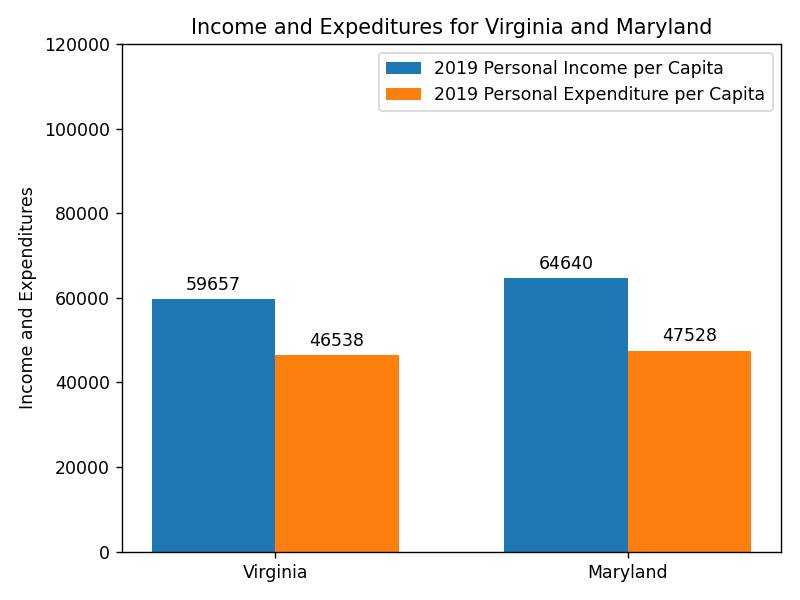

In [17]:
#How to pull out a series of Maryland on expenditure on Motor vehicles and parts (USD/Capita)
state_1 = "Virginia" #input("Choose the first state of your choice: ") 
state_2 = "Maryland" #input("Choose the second state of your choice: ")
variable_1 ="Per capita personal income (dollars) 2/"
variable_2 = "Personal consumption expenditures (USD/Capita)"
year = "2019"

#Pull data for state1
state1_income = combined_income_expenditure_df.loc[(state_1, variable_1 )][year]
state1_expend = combined_income_expenditure_df.loc[(state_1, variable_2 )][year]

#Pull data for state
state2_income = combined_income_expenditure_df.loc[(state_2, variable_1 )][year]
state2_expend = combined_income_expenditure_df.loc[(state_2, variable_2 )][year]
print(state1_income, state1_expend)
print(state2_income, state2_expend)

bar_chart = pd.DataFrame([{f'{state_1} income per capita in {year}':state1_income},\
                          {f'{state_2} income per capita in {year}':state2_income},\
                          {f'{state_1} expenditure per capita in {year}':state1_expend},\
                           {f'{state_2} expenditure per capita in {year}':state2_expend}
                         ])



labels = [state_1, state_2]
legend = [f'{year} Personal Income per Capita', f'{year} Personal Expenditure per Capita']
income_per_capita = [state1_income, state2_income]
expenditures_per_capita = [state1_expend, state2_expend]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, income_per_capita, width, label=state_1)
rects2 = ax.bar(x + width/2, expenditures_per_capita, width, label=state_2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Income and Expenditures')
ax.set_title(f'Income and Expeditures for {state_1} and {state_2}')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(legend)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
#ax.legend(legend, bbox_to_anchor=(1, 1), loc='upper left')
#plt.legend(bbox_to_anchor=(1, 1),bbox_transform=plt.gcf().transFigure)
plt.ylim(0,120000)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)
fig.tight_layout()

plt.show()


In [18]:
plt.savefig('../Analysis_results/barchart_2019.png', dpi=300)
#line_chart_df

<IPython.core.display.Javascript object>


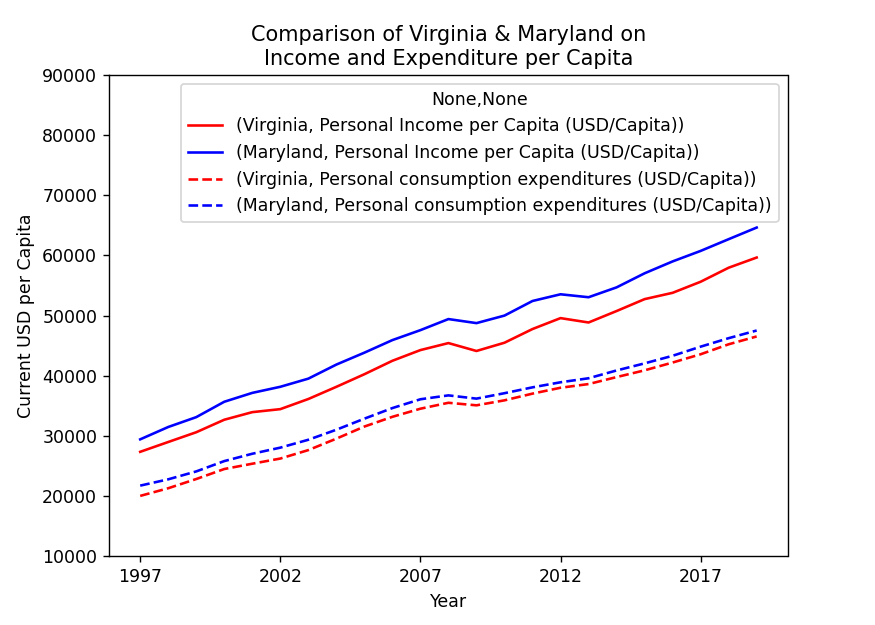

In [19]:
#Compare 2 states on income and Expenditure from 1997 to 2019
#Pull data for state1

state1_income = combined_income_expenditure_df.loc[(state_1, variable_1 )]
state1_expend = combined_income_expenditure_df.loc[(state_1, variable_2 )]

#Pull data for state
state2_income = combined_income_expenditure_df.loc[(state_2, variable_1 )]
state2_expend = combined_income_expenditure_df.loc[(state_2, variable_2 )]

#Create index
index = list(range(1997,2020))
line_chart_df = pd.concat([state1_income, state2_income, state1_expend, state2_expend], axis=1)

#line_chart_df.rename(columns={"Per capita personal income (dollars) 2/" :f'{state_1} Personal Income per Capita'})
line_chart_df = line_chart_df.rename(columns={"Per capita personal income (dollars) 2/" :f'Personal Income per Capita (USD/Capita)'})
line_chart_df.plot(kind='line',figsize=(7,5),\
                   title=f'Comparison of {state_1} & {state_2} on\nIncome and Expenditure per Capita',
                  ylim=(10000,90000), style = ['r-','b-','r--','b--'])
plt.xlabel("Year")
plt.ylabel("Current USD per Capita")


plt.show()
plt.savefig('..\Analysis_results\linechart_1997_2019.png', dpi=300)

In [20]:
#Display categories in full for analysis reference
pd.set_option('display.max_colwidth', 1)
pd.DataFrame(combined_income_expenditure_df.index.values).head(27)

,0
0,"(United States, Personal income (millions of dollars))"
1,"(United States, Population (persons) 1/)"
2,"(United States, Per capita personal income (dollars) 2/)"
3,"(United States, Personal consumption expenditures (USD/Capita))"
4,"(United States, Goods (USD/Capita))"
5,"(United States, Durable goods (USD/Capita))"
6,"(United States, Motor vehicles and parts (USD/Capita))"
7,"(United States, Furnishings and durable household equipment (USD/Capita))"
8,"(United States, Recreational goods and vehicles (USD/Capita))"
9,"(United States, Other durable goods (USD/Capita))"


<IPython.core.display.Javascript object>


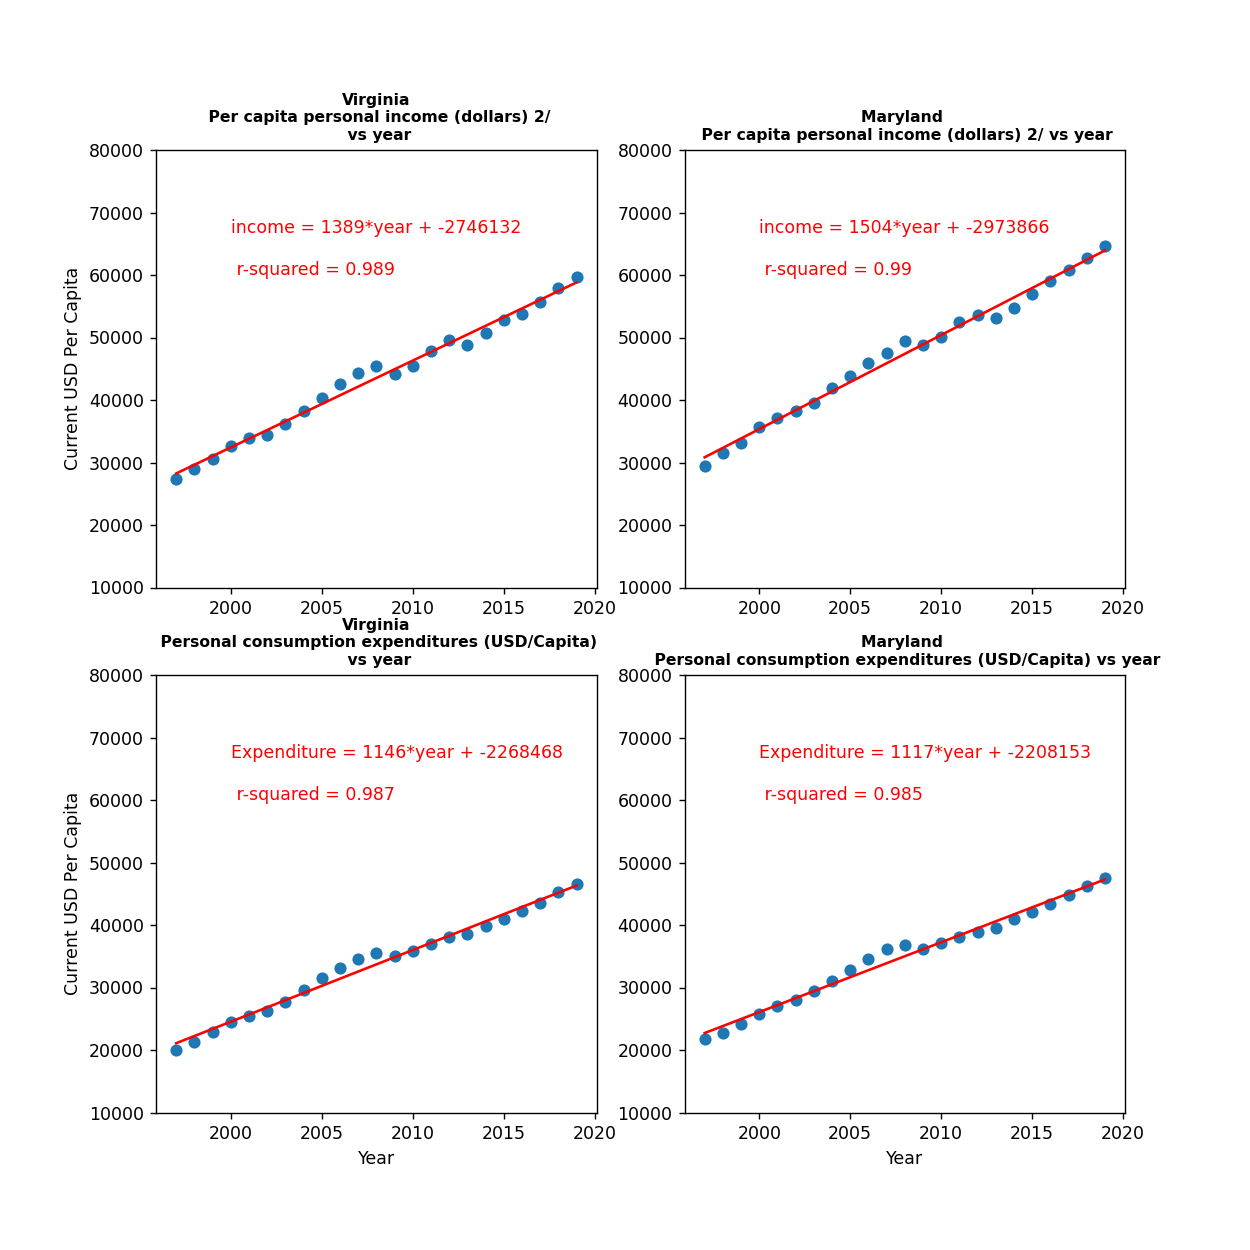

The r-squared is: 0.9889506533935588
The r-squared is: 0.9867871719011199
The r-squared is: 0.9902107884773433
The r-squared is: 0.9850451029937956


<ipython-input-21-ca5886fada34>:114: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


In [21]:
#Project what income and expenditure per capita will be in in 2025

fig, axs = plt.subplots(2,2,figsize=(10,10))


x_year = np.array(list(range(1997,2020)))
compare_1 = "Per capita personal income (dollars) 2/"
compare_2 = "Personal consumption expenditures (USD/Capita)"
xstate = state_1
ystate = state_1


#-------------------------[0,0]

y_state1_income_values = np.array(combined_income_expenditure_df.loc[(state_1, compare_1)].values.tolist())
y_state1_expend_values = np.array(combined_income_expenditure_df.loc[(state_1, compare_2)].values.tolist())


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_year, y_state1_income_values)
#regress_values =  x_values *slope + intercept


regress_values = x_year * (slope) + intercept
line_eq = "income = " + str(int(slope)) + "*year + " + str(int(intercept))
axs[0, 0].scatter(x_year, y_state1_income_values)


axs[0, 0].plot(x_year, regress_values,"r-")
axs[0, 0].annotate(f'{line_eq}\n\n r-squared = {round(rvalue**2,3)}',(2000,60000)  ,fontsize=10,color="red")
axs[0, 0].set_ylim(10000,80000)
axs[0, 0].set_ylabel(f'Current USD Per Capita')
axs[0, 0].set_title(f'{state_1}\n {compare_1}\n vs year', fontsize=9,fontweight="bold" )
print(f"The r-squared is: {rvalue**2}")


#income in year 2025
state1_income_2025 = int(2025 * slope + intercept)
state1_income_2025

#-----------------------------------#-------------------------[1,0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_year, y_state1_expend_values)
#regress_values =  x_values *slope + intercept


regress_values = x_year * (slope) + intercept
line_eq = "Expenditure = " + str(int(slope)) + "*year + " + str(int(intercept))
axs[1,0].scatter(x_year, y_state1_expend_values)


axs[1,0].plot(x_year, regress_values,"r-")
axs[1,0].annotate(f'{line_eq}\n\n r-squared = {round(rvalue**2,3)}',(2000,60000)  ,fontsize=10, color="red")
axs[1, 0].set_xlabel(f'Year')
axs[1, 0].set_ylabel(f'Current USD Per Capita')
axs[1,0].set_title(f'{state_1}\n {compare_2}\n vs year', fontsize=9,fontweight="bold" )
axs[1,0].set_ylim(10000,80000)
print(f"The r-squared is: {rvalue**2}")


#income in year 2025
state1_expend_2025 = int(2025 * slope + intercept)

plt.savefig('Correlation_1997_2019.png', dpi=300)

#------------------------------#-------------------------[0,1]
y_state2_income_values = np.array(combined_income_expenditure_df.loc[(state_2, compare_1)].values.tolist())
y_state2_expend_values = np.array(combined_income_expenditure_df.loc[(state_2, compare_2)].values.tolist())


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_year, y_state2_income_values)
#regress_values =  x_values *slope + intercept



regress_values = x_year * (slope) + intercept
line_eq = "income = " + str(int(slope)) + "*year + " + str(int(intercept))
axs[0,1].scatter(x_year, y_state2_income_values)


axs[0,1].plot(x_year, regress_values,"r-")
axs[0,1].annotate(f'{line_eq}\n\n r-squared = {round(rvalue**2,3)}',(2000,60000)  ,fontsize=10, color="red")
#plt.xlabel(f'Year')
#plt.ylabel(f'{state_2} {compare_1}')
axs[0,1].set_title(f'{state_2} \n {compare_1} vs year',fontsize=9,fontweight="bold")
axs[0, 1].set_ylim(10000,80000)

print(f"The r-squared is: {rvalue**2}")


#Expenditure in year 2025
state2_income_2025 = int(2025 * slope + intercept)
state2_income_2025

#-----------------------------------#-------------------------[1,1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_year, y_state2_expend_values)
#regress_values =  x_values *slope + intercept


regress_values = x_year * (slope) + intercept
line_eq = "Expenditure = " + str(int(slope)) + "*year + " + str(int(intercept))
axs[1, 1].scatter(x_year, y_state2_expend_values)
plt.show()

axs[1, 1].plot(x_year, regress_values,"r-")
axs[1, 1].annotate(f'{line_eq}\n\n r-squared = {round(rvalue**2,3)}',(2000,60000)  ,fontsize=10, color="red")
axs[1, 1].set_xlabel(f'Year')
#plt.ylabel(f'{state_2} {compare_2}')
axs[1, 1].set_title(f'{state_2} \n {compare_2} vs year', fontsize=9,fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
axs[1, 1].set_ylim(10000,80000)


fig.tight_layout()

plt.show()

#income in year 2025
state2_expend_2025 = int(2025 * slope + intercept)


In [22]:
plt.savefig('..\Analysis_results\correlations_1997_2019.png', dpi=300)

In [23]:
#Saving to csv for analysis
combined_income_expenditure_df.to_csv ("..\Analysis_results\Cleaned_income_Expenditure.csv", index = True, header=True)

<IPython.core.display.Javascript object>


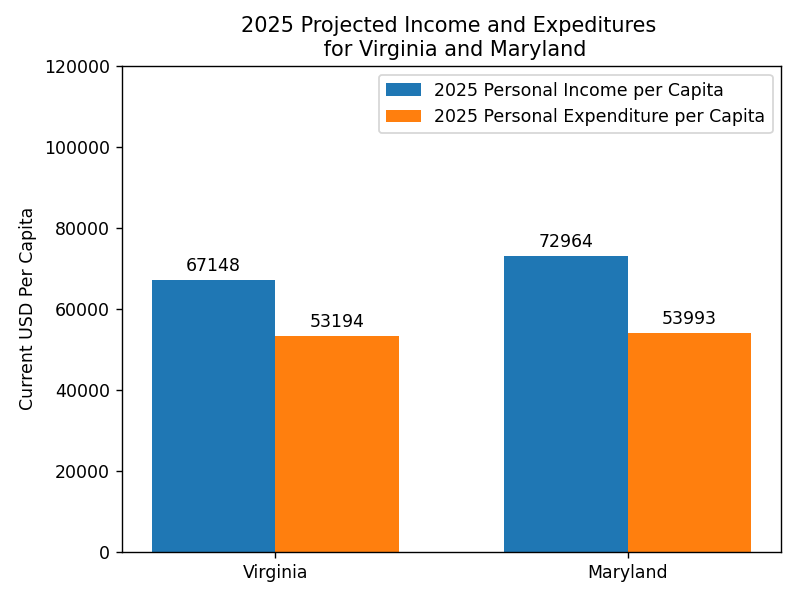

In [24]:
#plot bar graph showing 2025 earnings projections
labels = [state_1, state_2]
legend = [f'2025 Personal Income per Capita', f'2025 Personal Expenditure per Capita']
income_per_capita = [state1_income_2025, state2_income_2025]
expenditures_per_capita = [state1_expend_2025, state2_expend_2025]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, income_per_capita, width, label=state_1)
rects2 = ax.bar(x + width/2, expenditures_per_capita, width, label=state_2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Current USD Per Capita')
ax.set_title(f'2025 Projected Income and Expeditures \n for {state_1} and {state_2}')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(legend)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
#ax.legend(legend, bbox_to_anchor=(1, 1), loc='upper left')
#plt.legend(bbox_to_anchor=(1, 1),bbox_transform=plt.gcf().transFigure)
plt.ylim(0,120000)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)
fig.tight_layout()

plt.show()
plt.savefig('..\Analysis_results\projected income_expenditure_2025.png', dpi=300)

In [25]:
#Drop United states combined data from dataframe
#Find the mean for states from 1997 to 2019
states_mean_df =combined_income_expenditure_df.drop('United States')
states_mean_df = pd.DataFrame(states_mean_df.mean(axis=1))
states_mean_df = states_mean_df.reset_index(level=['Description'])
states_mean_df.head(10)

C:\Users\nicko\anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Description,0
State,,
Alabama,Personal income (millions of dollars),1.518132e+05
Alabama,Population (persons) 1/,4.671211e+06
Alabama,Per capita personal income (dollars) 2/,3.225648e+04
Alabama,Personal consumption expenditures (USD/Capita),2.609352e+04
Alabama,Goods (USD/Capita),1.009930e+04
Alabama,Durable goods (USD/Capita),3.198000e+03
Alabama,Motor vehicles and parts (USD/Capita),1.379217e+03
Alabama,Furnishings and durable household equipment (USD/Capita),6.959565e+02
Alabama,Recreational goods and vehicles (USD/Capita),7.175652e+02


In [26]:
#Find the average of categeries between 1997 and 2019
states_mean_df.head()

,Description,0
State,,
Alabama,Personal income (millions of dollars),1.518132e+05
Alabama,Population (persons) 1/,4.671211e+06
Alabama,Per capita personal income (dollars) 2/,3.225648e+04
Alabama,Personal consumption expenditures (USD/Capita),2.609352e+04
Alabama,Goods (USD/Capita),1.009930e+04


In [27]:
# Computing the statistical values on Income and Expenditure on all states from 1997 to 2019 on all states for Income pe capita and for Expenditure per capita

mean_df_income = states_mean_df[states_mean_df["Description"] == 'Per capita personal income (dollars) 2/'].rename(columns={0: "Income Per Capita"})
mean_df_expend = states_mean_df[states_mean_df["Description"] == 'Personal consumption expenditures (USD/Capita)'].rename(columns={0: "Expenditure Per Capita"})

sts_income = mean_df_income.aggregate(['mean', 'median', 'var', 'std', 'sem']).astype(int)
sts_expend = mean_df_income.aggregate(['mean', 'median', 'var', 'std', 'sem']).astype(int)

sts_expend = sts_expend.rename(columns={0: "Expenditure Per Capita"})
sts_income = sts_income.rename(columns={0: "Income Per Capita"})

mean_df_income = pd.DataFrame(mean_df_income['Income Per Capita']).astype(int)
mean_df_expend = pd.DataFrame(mean_df_expend['Expenditure Per Capita']).astype(int)
mean_df_income.head()

,Income Per Capita
State,
Alabama,32256
Alaska,45101
Arizona,33704
Arkansas,31490
California,44230


In [28]:
 # Calculating quartiles on Income and Expenditure
quartiles_sts_income = mean_df_income["Income Per Capita"].quantile([.25,.5,.75]).T    
quartiles_sts_expend = mean_df_expend["Expenditure Per Capita"].quantile([.25,.5,.75]).T
quartiles_sts_expend

0.25    27873.0
0.50    31420.0
0.75    33874.0
Name: Expenditure Per Capita, dtype: float64

In [29]:
# Retrieving lower and upper quartiles
lowerq_income = quartiles_sts_income[0.25]
upperq_income = quartiles_sts_income[0.75]
iqr_income = upperq_income-lowerq_income
lower_bound_income = lowerq_income - (1.5*iqr_income)
upper_bound_income = upperq_income + (1.5*iqr_income)

lowerq_expend = quartiles_sts_expend[0.25]
upperq_expend = quartiles_sts_expend[0.75]
iqr_expend = upperq_expend-lowerq_expend
lower_bound_expend = lowerq_expend - (1.5*iqr_expend)
upper_bound_expend = upperq_expend + (1.5*iqr_expend)
lowerq_expend

27873.0

2 States are potential outliers in terms of Income Per Capita from 1997 to 2019 as listed:
                      Income Per Capita
Connecticut           56730            
District of Columbia  59543            
------------
------------
1 States are potential outliers in terms of Expenditure Per Capita from 1997 to 2019 as listed:
                      Expenditure Per Capita
District of Columbia  48737                 


<IPython.core.display.Javascript object>


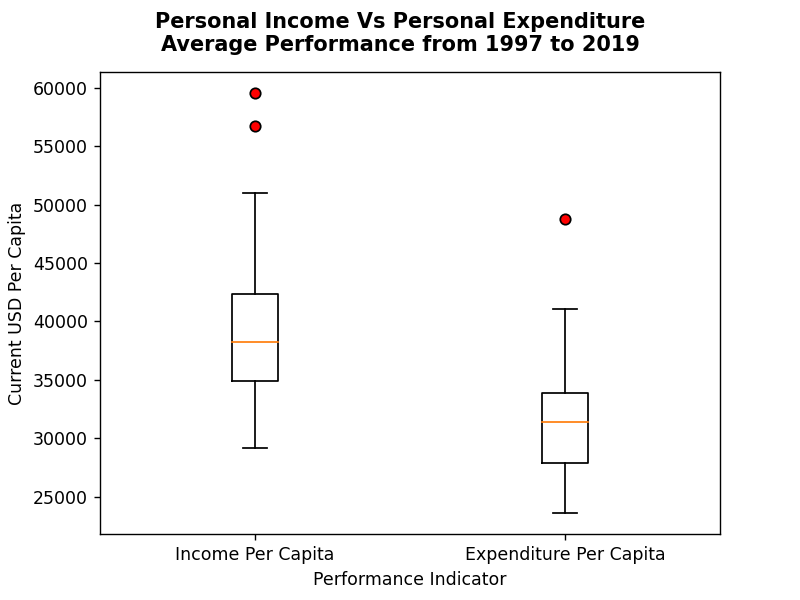

In [30]:
#finding Outlier States between 1997 to 2019 on Income Per Capita
outliers_income = [mean_df_income.loc[index] for index in list(mean_df_income.index.values) if mean_df_income["Income Per Capita"].loc[index] < lower_bound_income or mean_df_income["Income Per Capita"].loc[index] > upper_bound_income]
print(f'{len(outliers_income)} States are potential outliers in terms of Income Per Capita from 1997 to 2019 as listed:\n{pd.DataFrame(outliers_income)}')
print("------------\n------------")
outliers_expend = [mean_df_expend.loc[index] for index in list(mean_df_expend.index.values) if mean_df_expend["Expenditure Per Capita"].loc[index] < lower_bound_expend or mean_df_expend["Expenditure Per Capita"].loc[index] > upper_bound_expend]
print(f'{len(outliers_expend)} States are potential outliers in terms of Expenditure Per Capita from 1997 to 2019 as listed:\n{pd.DataFrame(outliers_expend)}')

#list(mean_df_expend["Expenditure Per Capita"])

income_list = list(mean_df_income["Income Per Capita"])
expend_list = list(mean_df_expend["Expenditure Per Capita"])
indicators = ["Income Per Capita", "Expenditure Per Capita"]
fig, (ax1) = plt.subplots()
fig.suptitle("Personal Income Vs Personal Expenditure\nAverage Performance from 1997 to 2019", fontsize=12, fontweight="bold")
ax1.boxplot(x = [income_list, expend_list],   flierprops=dict(markerfacecolor='r'))
ax1.set_ylabel("Current USD Per Capita")
ax1.set_xlabel("Performance Indicator")
plt.xticks([1, 2], indicators)
plt.show()
plt.savefig('..\Analysis_results\outlier states.png', dpi=300)

# Part 2: Using API to create datasets

### 1) API: Requests URL & Create CSV File

#### API: American Community Survey 1-Year Data (2005-2019) - State Level

In [31]:
# Create csv file for individual year from 2009 to 2019

# Means of Transportation
years = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
variable = 'B08101_001E'
title = 'transportation'

for year in years:
    url = f'https://api.census.gov/data/{year}/acs/acs1?get=NAME,{variable}&for=state:*&key={api_key}'
    data = requests.get(url).json()
    col_name = ['state', year, 'state code']
    df = pd.DataFrame(data[1:], columns=col_name)
    clean_df = df.drop(columns=['state code'])
    clean_df.to_csv(f'..\Resources_api\{year}_{title}.csv')

In [32]:
# Worked From Home
years = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
variable = 'B08101_049E'
title = 'worked_fm_home'

for year in years:
    url = f'https://api.census.gov/data/{year}/acs/acs1?get=NAME,{variable}&for=state:*&key={api_key}'
    data = requests.get(url).json()
    col_name = ['state', year, 'state code']
    df = pd.DataFrame(data[1:], columns=col_name)
    clean_df = df.drop(columns=['state code'])
    clean_df.to_csv(f'..\Resources_api\{year}_{title}.csv')

In [33]:
# Drove Alone
years = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
variable = 'B08101_009E'
title = 'drove'

for year in years:
    url = f'https://api.census.gov/data/{year}/acs/acs1?get=NAME,{variable}&for=state:*&key={api_key}'
    data = requests.get(url).json()
    col_name = ['state', year, 'state code']
    df = pd.DataFrame(data[1:], columns=col_name)
    clean_df = df.drop(columns=['state code'])
    clean_df.to_csv(f'..\Resources_api\{year}_{title}.csv')

In [34]:
# Carpooled
years = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
variable = 'B08101_017E'
title = 'carpooled'

for year in years:
    url = f'https://api.census.gov/data/{year}/acs/acs1?get=NAME,{variable}&for=state:*&key={api_key}'
    data = requests.get(url).json()
    col_name = ['state', year, 'state code']
    df = pd.DataFrame(data[1:], columns=col_name)
    clean_df = df.drop(columns=['state code'])
    clean_df.to_csv(f'..\Resources_api\{year}_{title}.csv')

In [35]:
# Walked
years = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
variable = 'B08101_033E'
title = 'walked'

for year in years:
    url = f'https://api.census.gov/data/{year}/acs/acs1?get=NAME,{variable}&for=state:*&key={api_key}'
    data = requests.get(url).json()
    col_name = ['state', year, 'state code']
    df = pd.DataFrame(data[1:], columns=col_name)
    clean_df = df.drop(columns=['state code'])
    clean_df.to_csv(f'..\Resources_api\{year}_{title}.csv')

In [36]:
# Public Transportation (Excluding Taxi)
years = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
variable = 'B08101_025E'
title = 'public_transportation'

for year in years:
    url = f'https://api.census.gov/data/{year}/acs/acs1?get=NAME,{variable}&for=state:*&key={api_key}'
    data = requests.get(url).json()
    col_name = ['state', year, 'state code']
    df = pd.DataFrame(data[1:], columns=col_name)
    clean_df = df.drop(columns=['state code'])
    clean_df.to_csv(f'..\Resources_api\{year}_{title}.csv')

In [37]:
# Taxi, Motercycle, Bicycle
years = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
variable = 'B08101_041E'
title = 'taxi_bikes'

for year in years:
    url = f'https://api.census.gov/data/{year}/acs/acs1?get=NAME,{variable}&for=state:*&key={api_key}'
    data = requests.get(url).json()
    col_name = ['state', year, 'state code']
    df = pd.DataFrame(data[1:], columns=col_name)
    clean_df = df.drop(columns=['state code'])
    clean_df.to_csv(f'..\Resources_api\{year}_{title}.csv')

### 2) Read CSV Files

In [38]:
# Toal Means of Transportation
df = pd.read_csv("../Resources_api/2009_transportation.csv")
df_2009 = df.drop(columns=['Unnamed: 0'])

In [39]:
df = pd.read_csv('../Resources_api/2010_transportation.csv')
df_2010 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2011_transportation.csv')
df_2011 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2012_transportation.csv')
df_2012 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2013_transportation.csv')
df_2013 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2014_transportation.csv')
df_2014 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2015_transportation.csv')
df_2015 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2016_transportation.csv')
df_2016 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2017_transportation.csv')
df_2017 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2018_transportation.csv')
df_2018 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2019_transportation.csv')
df_2019 = df.drop(columns=['Unnamed: 0'])

dfs = [df.set_index(['state']) for df in [df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019]]
transportation_dfs = pd.concat(dfs, axis=1)
transportation_df = transportation_dfs.rename(columns={'index':'state'})

In [40]:
# Worked From Home
df = pd.read_csv('../Resources_api/2009_worked_fm_home.csv')
df_2009 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2010_worked_fm_home.csv')
df_2010 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2011_worked_fm_home.csv')
df_2011 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2012_worked_fm_home.csv')
df_2012 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2013_worked_fm_home.csv')
df_2013 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2014_worked_fm_home.csv')
df_2014 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2015_worked_fm_home.csv')
df_2015 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2016_worked_fm_home.csv')
df_2016 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2017_worked_fm_home.csv')
df_2017 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2018_worked_fm_home.csv')
df_2018 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv('../Resources_api/2019_worked_fm_home.csv')
df_2019 = df.drop(columns=['Unnamed: 0'])

dfs = [df.set_index(['state']) for df in [df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019]]
worked_fm_home_dfs = pd.concat(dfs, axis=1)
worked_fm_home_df = worked_fm_home_dfs.rename(columns={'index':'state'})

In [41]:
# Drove
title = 'drove'

df = pd.read_csv(f'../Resources_api/2009_{title}.csv')
df_2009 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2010_{title}.csv')
df_2010 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2011_{title}.csv')
df_2011 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2012_{title}.csv')
df_2012 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2013_{title}.csv')
df_2013 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2014_{title}.csv')
df_2014 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2015_{title}.csv')
df_2015 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2016_{title}.csv')
df_2016 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2017_{title}.csv')
df_2017 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2018_{title}.csv')
df_2018 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2019_{title}.csv')
df_2019 = df.drop(columns=['Unnamed: 0'])

dfs = [df.set_index(['state']) for df in [df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019]]
drove_dfs = pd.concat(dfs, axis=1)
drove_df = drove_dfs.rename(columns={'index':'state'})

In [42]:
# Carpooled
title = 'carpooled'

df = pd.read_csv(f'../Resources_api/2009_{title}.csv')
df_2009 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2010_{title}.csv')
df_2010 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2011_{title}.csv')
df_2011 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2012_{title}.csv')
df_2012 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2013_{title}.csv')
df_2013 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2014_{title}.csv')
df_2014 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2015_{title}.csv')
df_2015 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2016_{title}.csv')
df_2016 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2017_{title}.csv')
df_2017 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2018_{title}.csv')
df_2018 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2019_{title}.csv')
df_2019 = df.drop(columns=['Unnamed: 0'])

dfs = [df.set_index(['state']) for df in [df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019]]
carpooled_dfs = pd.concat(dfs, axis=1)
carpooled_df = carpooled_dfs.rename(columns={'index':'state'})

In [43]:
# Walked
title = 'walked'

df = pd.read_csv(f'../Resources_api/2009_{title}.csv')
df_2009 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2010_{title}.csv')
df_2010 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2011_{title}.csv')
df_2011 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2012_{title}.csv')
df_2012 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2013_{title}.csv')
df_2013 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2014_{title}.csv')
df_2014 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2015_{title}.csv')
df_2015 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2016_{title}.csv')
df_2016 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2017_{title}.csv')
df_2017 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2018_{title}.csv')
df_2018 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2019_{title}.csv')
df_2019 = df.drop(columns=['Unnamed: 0'])

dfs = [df.set_index(['state']) for df in [df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019]]
walked_dfs = pd.concat(dfs, axis=1)
walked_df = walked_dfs.rename(columns={'index':'state'})

In [44]:
# Public Transportation
title = 'public_transportation'

df = pd.read_csv(f'../Resources_api/2009_{title}.csv')
df_2009 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2010_{title}.csv')
df_2010 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2011_{title}.csv')
df_2011 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2012_{title}.csv')
df_2012 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2013_{title}.csv')
df_2013 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2014_{title}.csv')
df_2014 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2015_{title}.csv')
df_2015 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2016_{title}.csv')
df_2016 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2017_{title}.csv')
df_2017 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2018_{title}.csv')
df_2018 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2019_{title}.csv')
df_2019 = df.drop(columns=['Unnamed: 0'])

dfs = [df.set_index(['state']) for df in [df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019]]
public_transportation_dfs = pd.concat(dfs, axis=1)
public_transportation_df = public_transportation_dfs.rename(columns={'index':'state'})

In [45]:
# Taxi Bikes
title = 'taxi_bikes'

df = pd.read_csv(f'../Resources_api/2009_{title}.csv')
df_2009 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2010_{title}.csv')
df_2010 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2011_{title}.csv')
df_2011 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2012_{title}.csv')
df_2012 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2013_{title}.csv')
df_2013 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2014_{title}.csv')
df_2014 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2015_{title}.csv')
df_2015 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2016_{title}.csv')
df_2016 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2017_{title}.csv')
df_2017 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2018_{title}.csv')
df_2018 = df.drop(columns=['Unnamed: 0'])

df = pd.read_csv(f'../Resources_api/2019_{title}.csv')
df_2019 = df.drop(columns=['Unnamed: 0'])

dfs = [df.set_index(['state']) for df in [df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019]]
taxi_bikes_dfs = pd.concat(dfs, axis=1)
taxi_bikes_df = taxi_bikes_dfs.rename(columns={'index':'state'})

### 3) Create DataFrame

#### 3.1) DMV Means of Transporation Individual DataFrames

In [46]:
# DMV Total Means of Transportation
#transportation_df
va_transportation = pd.DataFrame(transportation_df.loc['Virginia']).rename(columns={'Virginia':'VA Total'})
dc_transportation = pd.DataFrame(transportation_df.loc['District of Columbia']).rename(columns={'District of Columbia':'DC Total'})
md_transportation = pd.DataFrame(transportation_df.loc['Maryland']).rename(columns={'Maryland':'MD Total'})
dmv_total = pd.concat([va_transportation, dc_transportation, md_transportation], axis=1)
dmv_total.head()

,VA Total,DC Total,MD Total
2009,3822714,291083,2840465
2010,3845626,296717,2847946
2011,3883249,306801,2855500
2012,3967188,326143,2909794
2013,4018400,330087,2946590


In [47]:
# DMV Worked From Home
# worked_fm_home_df
va_worked_fm_home = pd.DataFrame(worked_fm_home_df.loc['Virginia']).rename(columns={'Virginia':'VA fm Home'})
dc_worked_fm_home = pd.DataFrame(worked_fm_home_df.loc['District of Columbia']).rename(columns={'District of Columbia':'DC fm Home'})
md_worked_fm_home = pd.DataFrame(worked_fm_home_df.loc['Maryland']).rename(columns={'Maryland':'MD fm Home'})
dmv_worked_fm_home = pd.concat([va_worked_fm_home, dc_worked_fm_home, md_worked_fm_home], axis=1)
dmv_worked_fm_home.head()

,VA fm Home,DC fm Home,MD fm Home
2009,157174,15041,117152
2010,167035,14870,122635
2011,176921,14700,116524
2012,187750,15129,121882
2013,182279,14474,124944


In [48]:
# DMV Drove
# drove_df
va_drove = pd.DataFrame(drove_df.loc['Virginia']).rename(columns={'Virginia':'VA Drove'})
dc_drove = pd.DataFrame(drove_df.loc['District of Columbia']).rename(columns={'District of Columbia':'DC Drove'})
md_drove = pd.DataFrame(drove_df.loc['Maryland']).rename(columns={'Maryland':'MD Drove'})
dmv_drove = pd.concat([va_drove, dc_drove, md_drove], axis=1)
dmv_drove.head()

,VA Drove,DC Drove,MD Drove
2009,2962941,106115,2084261
2010,2966482,103239,2079711
2011,3032187,101621,2091777
2012,3067222,111088,2135379
2013,3112188,106657,2180872


In [49]:
# DMV Carpooled
# carpooled_df
va_carpooled = pd.DataFrame(carpooled_df.loc['Virginia']).rename(columns={'Virginia':'VA Carpooled'})
dc_carpooled = pd.DataFrame(carpooled_df.loc['District of Columbia']).rename(columns={'District of Columbia':'DC Carpooled'})
md_carpooled = pd.DataFrame(carpooled_df.loc['Maryland']).rename(columns={'Maryland':'MD Carpooled'})
dmv_carpooled = pd.concat([va_carpooled, dc_carpooled, md_carpooled], axis=1)
dmv_carpooled.head()

,VA Carpooled,DC Carpooled,MD Carpooled
2009,396824,19375,284342
2010,383909,17630,304131
2011,355426,19792,288690
2012,393282,18396,286359
2013,376679,17512,266301


In [50]:
# DMV Walked
# walked_df
va_walked = pd.DataFrame(walked_df.loc['Virginia']).rename(columns={'Virginia':'VA Walked'})
dc_walked = pd.DataFrame(walked_df.loc['District of Columbia']).rename(columns={'District of Columbia':'DC Walked'})
md_walked = pd.DataFrame(walked_df.loc['Maryland']).rename(columns={'Maryland':'MD Walked'})
dmv_walked = pd.concat([va_walked, dc_walked, md_walked], axis=1)
dmv_walked.head()

,VA Walked,DC Walked,MD Walked
2009,85818,32328,74434
2010,103982,34895,64917
2011,90716,36200,65220
2012,87938,38795,71970
2013,99433,45003,69897


In [51]:
# DMV Public Transportation
# public_transportation_df
va_public_transportation = pd.DataFrame(public_transportation_df.loc['Virginia']).rename(columns={'Virginia':'VA Public Transportation'})
dc_public_transportation = pd.DataFrame(public_transportation_df.loc['District of Columbia']).rename(columns={'District of Columbia':'DC Public Transportation'})
md_public_transportation = pd.DataFrame(public_transportation_df.loc['Maryland']).rename(columns={'Maryland':'MD Public Transportation'})
dmv_public_transportation = pd.concat([va_public_transportation, dc_public_transportation, md_public_transportation], axis=1)
dmv_public_transportation.head()

,VA Public Transportation,DC Public Transportation,MD Public Transportation
2009,168359,108046,248834
2010,168554,113648,245628
2011,174888,121460,262605
2012,174525,125890,258280
2013,176996,127045,268560


In [52]:
# DMV Taxi and Bikes
# taxi_bikes_df 
dmv_taxi_bikes = pd.DataFrame(taxi_bikes_df.loc[['Virginia','District of Columbia','Maryland']])

va_taxi_bikes = pd.DataFrame(taxi_bikes_df.loc['Virginia']).rename(columns={'Virginia':'VA Taxi/Bikes'})
dc_taxi_bikes = pd.DataFrame(taxi_bikes_df.loc['District of Columbia']).rename(columns={'District of Columbia':'DC Taxi/Bikes'})
md_taxi_bikes = pd.DataFrame(taxi_bikes_df.loc['Maryland']).rename(columns={'Maryland':'MD Taxi/Bikes'})
dmv_taxi_bikes = pd.concat([va_taxi_bikes, dc_taxi_bikes, md_taxi_bikes], axis=1)
dmv_taxi_bikes.head()

,VA Taxi/Bikes,DC Taxi/Bikes,MD Taxi/Bikes
2009,51598,10178,31442
2010,55664,12435,30924
2011,53111,13028,30684
2012,56471,16845,35924
2013,70825,19396,36016


#### 3.2) DMA Area: Expenditure DataFrame

In [53]:
# Read SAEXP1__ALL_AREAS_1997_2019.csv
file = '../Resources_csv/SAEXP1__ALL_AREAS_1997_2019.csv'
data = pd.read_csv(file)
data.head()

data2 = data[['GeoName', 'Description','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']]
data3 = data2.set_index('GeoName')

# VA, MD, DC
va_data = data3.loc['Virginia'].rename(columns={'Description':'VA Description'}).set_index('VA Description')
md_data = data3.loc['Maryland'].rename(columns={'Description':'MD Description'}).set_index('MD Description')
dc_data = data3.loc['District of Columbia'].rename(columns={'Description':'DC Description'}).set_index('DC Description')

# motor_vehicles_and_parts
va_motor = pd.DataFrame(va_data.iloc[3])
md_motor = pd.DataFrame(md_data.iloc[3])
dc_motor = pd.DataFrame(dc_data.iloc[3])

# transportation_services 
va_tservice = pd.DataFrame(va_data.iloc[16])
md_tservice = pd.DataFrame(md_data.iloc[16])
dc_tservice = pd.DataFrame(dc_data.iloc[16])

# Merge: motor_vehicles_and_parts + transportation_services
va_motor_tservice = pd.concat([va_motor, va_tservice], axis=1)
md_motor_tservice = pd.concat([md_motor, md_tservice], axis=1)
dc_motor_tservice = pd.concat([dc_motor, dc_tservice], axis=1)

## 4) Plots and Data Visualization

#### Summaries and Reflecting Questions
1. The expenditure on motor vehicles and parts: More in VA than in MD.
2. Population that used public transporation to work: More in MD than in VA. 


#### Reflectiing Question:
1. How often do people in VA/MD use public transporation?
2. What are the average travelling distance?
3. How do frequency and distance affect expenditures in public transportation?

### Expenditure and Population Comparison: Public Transporation Service (VA/MD)

<IPython.core.display.Javascript object>


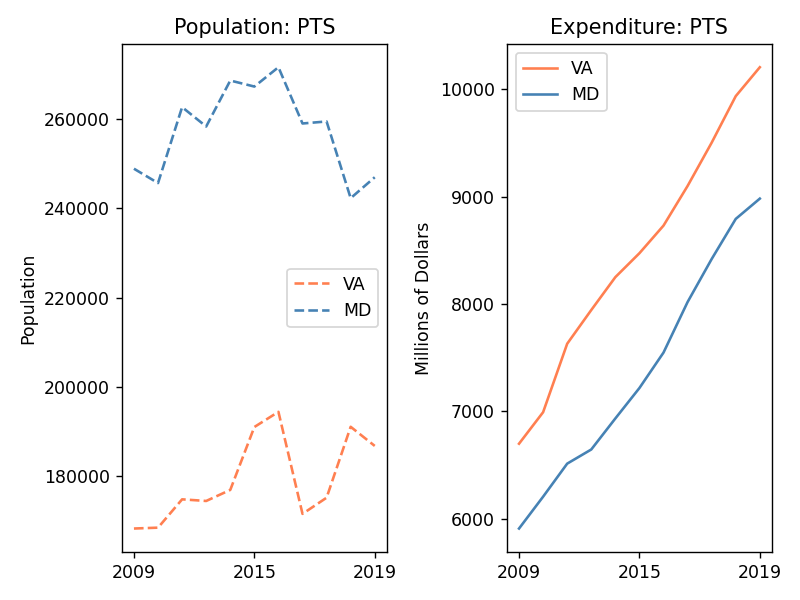

In [54]:
# Public Transporation
year = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
# Population
va_public_transportation = dmv_public_transportation['VA Public Transportation']
md_public_transportation = dmv_public_transportation['MD Public Transportation']

# Expenditure
va_tservice = pd.DataFrame(va_data.iloc[16])
md_tservice = pd.DataFrame(md_data.iloc[16])

# Plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot(year, va_public_transportation, color = 'coral', linestyle = '--', label='VA')
ax1.plot(year, md_public_transportation, color = 'steelblue', linestyle = '--', label='MD')

ax2.plot(year, va_tservice, color = 'coral', label='VA')
ax2.plot(year, md_tservice, color = 'steelblue', label='MD')

ax1.legend()
ax1.set_title('Population: PTS')
ax1.set_ylabel('Population')

ax2.legend()
ax2.set_title('Expenditure: PTS')
ax2.set_ylabel('Millions of Dollars')

plt.setp((ax1, ax2), xticks=[0, 5, 10], xticklabels=['2009', '2015', '2019'])

plt.tight_layout()
plt.show()
plt.savefig('..\Analysis_results\Public Transportation.png', dpi=300)


In [55]:
dmv_carpooled
#dmv_carpooled.sum()
dmv_public_transportation
#dmv_public_transportation.sum()

,VA Public Transportation,DC Public Transportation,MD Public Transportation
2009,168359,108046,248834
2010,168554,113648,245628
2011,174888,121460,262605
2012,174525,125890,258280
2013,176996,127045,268560
2014,191066,123707,267211
2015,194457,128135,271533
2016,171640,130451,258950
2017,175257,122643,259404
2018,191112,130216,242247


# Part 3: ...

In [56]:
#locating the csv files...
#year 2009-2019...
carpooled_csv = "../Resources_csv/carpool.csv"
drove_csv = "../Resources_csv/drove.csv"
publicTrans_csv = "../Resources_csv/publicTransit.csv"
taxiBikes_csv = "../Resources_csv/taxiBikes.csv"
transport_csv = "../Resources_csv/transportation.csv"
walk_csv = "../Resources_csv/walked.csv"
wfh_csv = "../Resources_csv/wfh.csv"


In [57]:
#reading the csv files...

#year 2009-2019...
carpooled_df = pd.read_csv(carpooled_csv)
drove_df = pd.read_csv(drove_csv)
publicTrans_df = pd.read_csv(publicTrans_csv)
taxiBikes_df = pd.read_csv(taxiBikes_csv)
transport_df = pd.read_csv(transport_csv)
walk_df = pd.read_csv(walk_csv)
wfh_df = pd.read_csv(wfh_csv)


In [58]:
# Merge the first two datasets on "state" so that no data is lost
combined_states_df = pd.merge(carpooled_df, drove_df, how='outer', on='state')
combined_states_df.head()

,state,2009_x,2010_x,2011_x,2012_x,2013_x,2014_x,2015_x,2016_x,2017_x,...,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y
0,Alabama,202114.0,195292.0,194044.0,186834.0,169281.0,171927.0,180752.0,165046.0,173508.0,...,1648706.0,1657419.0,1680837.0,1713067.0,1724178.0,1719972.0,1768180.0,1748949.0,1784690.0,1817479.0
1,Alaska,44499.0,45376.0,43244.0,47473.0,46463.0,43221.0,45738.0,44258.0,41554.0,...,230116.0,237947.0,235946.0,238572.0,249481.0,246577.0,250492.0,243466.0,241624.0,244725.0
2,Arizona,325472.0,305162.0,308658.0,300566.0,304044.0,295724.0,307864.0,328645.0,339590.0,...,2005289.0,2009959.0,2088074.0,2100376.0,2178267.0,2234511.0,2289515.0,2362162.0,2417249.0,2478184.0
3,Arkansas,141904.0,138346.0,125188.0,137885.0,124069.0,136027.0,134929.0,128593.0,126414.0,...,1005284.0,1006040.0,1013982.0,1020341.0,1031366.0,1035546.0,1050898.0,1068253.0,1075012.0,1082408.0
4,California,1873082.0,1831538.0,1780802.0,1821450.0,1825475.0,1813154.0,1770281.0,1846542.0,1837270.0,...,11650145.0,11754858.0,12059924.0,12260080.0,12679198.0,13031320.0,13186177.0,13541563.0,13681331.0,13767903.0


In [59]:
# Rename our _x columns to "carpool2009", "carpool2010", "carpool2011", ..."carpool2019"
combined_states_df = combined_states_df.rename(columns={"2009_x":"carpool2009", "2010_x":"carpool2010","2011_x":"carpool2011", "2012_x":"carpool2012","2013_x":"carpool2013","2014_x":"carpool2014", "2015_x":"carpool2015","2016_x":"carpool2016","2017_x":"carpool2017", "2018_x":"carpool2018","2019_x":"carpool2019"})

# Rename our _y columns to "drove2009", "drove2010", "drove2011", ..."drove2019"
combined_states_df = combined_states_df.rename(columns={"2009_y":"drove2009","2010_y":"drove2010","2011_y":"drove2011", "2012_y":"drove2012","2013_y":"drove2013","2014_y":"drove2014", "2015_y":"drove2015","2016_y":"drove2016","2017_y":"drove2017", "2018_y":"drove2018","2019_y":"drove2019"})

combined_states_df.head()

,state,carpool2009,carpool2010,carpool2011,carpool2012,carpool2013,carpool2014,carpool2015,carpool2016,carpool2017,...,drove2010,drove2011,drove2012,drove2013,drove2014,drove2015,drove2016,drove2017,drove2018,drove2019
0,Alabama,202114.0,195292.0,194044.0,186834.0,169281.0,171927.0,180752.0,165046.0,173508.0,...,1648706.0,1657419.0,1680837.0,1713067.0,1724178.0,1719972.0,1768180.0,1748949.0,1784690.0,1817479.0
1,Alaska,44499.0,45376.0,43244.0,47473.0,46463.0,43221.0,45738.0,44258.0,41554.0,...,230116.0,237947.0,235946.0,238572.0,249481.0,246577.0,250492.0,243466.0,241624.0,244725.0
2,Arizona,325472.0,305162.0,308658.0,300566.0,304044.0,295724.0,307864.0,328645.0,339590.0,...,2005289.0,2009959.0,2088074.0,2100376.0,2178267.0,2234511.0,2289515.0,2362162.0,2417249.0,2478184.0
3,Arkansas,141904.0,138346.0,125188.0,137885.0,124069.0,136027.0,134929.0,128593.0,126414.0,...,1005284.0,1006040.0,1013982.0,1020341.0,1031366.0,1035546.0,1050898.0,1068253.0,1075012.0,1082408.0
4,California,1873082.0,1831538.0,1780802.0,1821450.0,1825475.0,1813154.0,1770281.0,1846542.0,1837270.0,...,11650145.0,11754858.0,12059924.0,12260080.0,12679198.0,13031320.0,13186177.0,13541563.0,13681331.0,13767903.0


In [60]:
# Merge our newly combined dataframe with the publicTrans_df dataframe
combined_states_df = pd.merge(combined_states_df, publicTrans_df, how="outer", on="state")
combined_states_df.head()

,state,carpool2009,carpool2010,carpool2011,carpool2012,carpool2013,carpool2014,carpool2015,carpool2016,carpool2017,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,202114.0,195292.0,194044.0,186834.0,169281.0,171927.0,180752.0,165046.0,173508.0,...,7964.0,9329.0,8096.0,9592.0,8276.0,6066.0,6334.0,7234.0,6983.0,8867.0
1,Alaska,44499.0,45376.0,43244.0,47473.0,46463.0,43221.0,45738.0,44258.0,41554.0,...,4034.0,6474.0,5746.0,6589.0,4703.0,5608.0,4381.0,5827.0,4382.0,3373.0
2,Arizona,325472.0,305162.0,308658.0,300566.0,304044.0,295724.0,307864.0,328645.0,339590.0,...,46829.0,52557.0,54614.0,64986.0,57615.0,59686.0,55372.0,55495.0,53718.0,55020.0
3,Arkansas,141904.0,138346.0,125188.0,137885.0,124069.0,136027.0,134929.0,128593.0,126414.0,...,6058.0,5271.0,5748.0,5803.0,4072.0,5791.0,4247.0,3788.0,5009.0,5291.0
4,California,1873082.0,1831538.0,1780802.0,1821450.0,1825475.0,1813154.0,1770281.0,1846542.0,1837270.0,...,820349.0,827736.0,851099.0,889921.0,914442.0,923600.0,910353.0,919579.0,914825.0,970901.0


In [61]:
# Rename "2009", "2010", ... "2019" to "public2009", "public2010", ..."public2019"
combined_states_df = combined_states_df.rename(columns={"2009":"public2009","2010":"public2010","2011":"public2011", "2012":"public2012","2013":"public2013","2014":"public2014", "2015":"public2015","2016":"public2016","2017":"public2017", "2018":"public2018","2019":"public2019"})

combined_states_df.head()

,state,carpool2009,carpool2010,carpool2011,carpool2012,carpool2013,carpool2014,carpool2015,carpool2016,carpool2017,...,public2010,public2011,public2012,public2013,public2014,public2015,public2016,public2017,public2018,public2019
0,Alabama,202114.0,195292.0,194044.0,186834.0,169281.0,171927.0,180752.0,165046.0,173508.0,...,7964.0,9329.0,8096.0,9592.0,8276.0,6066.0,6334.0,7234.0,6983.0,8867.0
1,Alaska,44499.0,45376.0,43244.0,47473.0,46463.0,43221.0,45738.0,44258.0,41554.0,...,4034.0,6474.0,5746.0,6589.0,4703.0,5608.0,4381.0,5827.0,4382.0,3373.0
2,Arizona,325472.0,305162.0,308658.0,300566.0,304044.0,295724.0,307864.0,328645.0,339590.0,...,46829.0,52557.0,54614.0,64986.0,57615.0,59686.0,55372.0,55495.0,53718.0,55020.0
3,Arkansas,141904.0,138346.0,125188.0,137885.0,124069.0,136027.0,134929.0,128593.0,126414.0,...,6058.0,5271.0,5748.0,5803.0,4072.0,5791.0,4247.0,3788.0,5009.0,5291.0
4,California,1873082.0,1831538.0,1780802.0,1821450.0,1825475.0,1813154.0,1770281.0,1846542.0,1837270.0,...,820349.0,827736.0,851099.0,889921.0,914442.0,923600.0,910353.0,919579.0,914825.0,970901.0


In [62]:
# Merge our newly combined dataframe with the taxiBikes_df dataframe
combined_states_df = pd.merge(combined_states_df, taxiBikes_df, how="outer", on="state")
combined_states_df.head()

,state,carpool2009,carpool2010,carpool2011,carpool2012,carpool2013,carpool2014,carpool2015,carpool2016,carpool2017,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,202114.0,195292.0,194044.0,186834.0,169281.0,171927.0,180752.0,165046.0,173508.0,...,18172.0,20200.0,20522.0,20809.0,22851.0,19046.0,21175.0,19462.0,19833.0,23984.0
1,Alaska,44499.0,45376.0,43244.0,47473.0,46463.0,43221.0,45738.0,44258.0,41554.0,...,18024.0,17830.0,21165.0,19215.0,19161.0,20256.0,17273.0,18622.0,19454.0,19865.0
2,Arizona,325472.0,305162.0,308658.0,300566.0,304044.0,295724.0,307864.0,328645.0,339590.0,...,61279.0,74987.0,75353.0,77716.0,81828.0,77347.0,74706.0,73568.0,85028.0,83540.0
3,Arkansas,141904.0,138346.0,125188.0,137885.0,124069.0,136027.0,134929.0,128593.0,126414.0,...,17820.0,15992.0,12817.0,18200.0,14661.0,16619.0,14882.0,12943.0,16473.0,13591.0
4,California,1873082.0,1831538.0,1780802.0,1821450.0,1825475.0,1813154.0,1770281.0,1846542.0,1837270.0,...,365352.0,380879.0,393237.0,434841.0,449378.0,464283.0,456964.0,455955.0,478550.0,482036.0


In [63]:
# Rename "2009", "2010", ... "2019" to "taxi2009", "taxi2010", ..."taxi2019"
combined_states_df = combined_states_df.rename(columns={"2009":"taxi2009","2010":"taxi2010","2011":"taxi2011", "2012":"taxi2012","2013":"taxi2013","2014":"taxi2014", "2015":"taxi2015","2016":"taxi2016","2017":"taxi2017", "2018":"taxi2018","2019":"taxi2019"})

combined_states_df.head()

,state,carpool2009,carpool2010,carpool2011,carpool2012,carpool2013,carpool2014,carpool2015,carpool2016,carpool2017,...,taxi2010,taxi2011,taxi2012,taxi2013,taxi2014,taxi2015,taxi2016,taxi2017,taxi2018,taxi2019
0,Alabama,202114.0,195292.0,194044.0,186834.0,169281.0,171927.0,180752.0,165046.0,173508.0,...,18172.0,20200.0,20522.0,20809.0,22851.0,19046.0,21175.0,19462.0,19833.0,23984.0
1,Alaska,44499.0,45376.0,43244.0,47473.0,46463.0,43221.0,45738.0,44258.0,41554.0,...,18024.0,17830.0,21165.0,19215.0,19161.0,20256.0,17273.0,18622.0,19454.0,19865.0
2,Arizona,325472.0,305162.0,308658.0,300566.0,304044.0,295724.0,307864.0,328645.0,339590.0,...,61279.0,74987.0,75353.0,77716.0,81828.0,77347.0,74706.0,73568.0,85028.0,83540.0
3,Arkansas,141904.0,138346.0,125188.0,137885.0,124069.0,136027.0,134929.0,128593.0,126414.0,...,17820.0,15992.0,12817.0,18200.0,14661.0,16619.0,14882.0,12943.0,16473.0,13591.0
4,California,1873082.0,1831538.0,1780802.0,1821450.0,1825475.0,1813154.0,1770281.0,1846542.0,1837270.0,...,365352.0,380879.0,393237.0,434841.0,449378.0,464283.0,456964.0,455955.0,478550.0,482036.0


In [64]:
# Merge our newly combined dataframe with the transport_df dataframe
combined_states_df = pd.merge(combined_states_df, transport_df, how="outer", on="state")
combined_states_df.head()

,state,carpool2009,carpool2010,carpool2011,carpool2012,carpool2013,carpool2014,carpool2015,carpool2016,carpool2017,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,202114.0,195292.0,194044.0,186834.0,169281.0,171927.0,180752.0,165046.0,173508.0,...,1951769.0,1953274.0,1970822.0,1983610.0,2007426.0,2011723.0,2053191.0,2041619.0,2068020.0,2134022.0
1,Alaska,44499.0,45376.0,43244.0,47473.0,46463.0,43221.0,45738.0,44258.0,41554.0,...,343424.0,348777.0,356567.0,357776.0,359211.0,363075.0,362804.0,351282.0,355403.0,349811.0
2,Arizona,325472.0,305162.0,308658.0,300566.0,304044.0,295724.0,307864.0,328645.0,339590.0,...,2621839.0,2650164.0,2721795.0,2754451.0,2831592.0,2899727.0,2992943.0,3086150.0,3174586.0,3276420.0
3,Arkansas,141904.0,138346.0,125188.0,137885.0,124069.0,136027.0,134929.0,128593.0,126414.0,...,1225968.0,1215837.0,1233150.0,1223214.0,1249674.0,1253288.0,1264585.0,1281666.0,1301150.0,1313514.0
4,California,1873082.0,1831538.0,1780802.0,1821450.0,1825475.0,1813154.0,1770281.0,1846542.0,1837270.0,...,15921475.0,16047067.0,16432358.0,16745843.0,17254926.0,17633846.0,17926224.0,18320629.0,18530052.0,18730251.0


In [65]:
# Rename "2009", "2010", ... "2019" to "transport2009", "transport2010", ..."transport2019"
combined_states_df = combined_states_df.rename(columns={"2009":"transport2009","2010":"transport2010","2011":"transport2011", "2012":"transport2012","2013":"transport2013","2014":"transport2014", "2015":"transport2015","2016":"transport2016","2017":"transport2017", "2018":"transport2018","2019":"transport2019"})

#combined_states_df.head()

In [66]:
# Merge our newly combined dataframe with the walk_df dataframe
combined_states_df = pd.merge(combined_states_df, walk_df, how="outer", on="state")
#combined_states_df.head()

In [67]:
# Rename "2009", "2010", ... "2019" to "walk2009", "walk2010", ..."walk2019"
combined_states_df = combined_states_df.rename(columns={"2009":"walk2009","2010":"walk2010","2011":"walk2011", "2012":"walk2012","2013":"walk2013","2014":"walk2014", "2015":"walk2015","2016":"walk2016","2017":"walk2017", "2018":"walk2018","2019":"walk2019"})



In [68]:
# Merge our newly combined dataframe with the wfh_df dataframe
combined_states_df = pd.merge(combined_states_df, wfh_df, how="outer", on="state")
#combined_states_df.head()

In [69]:
# Rename "2009", "2010", ... "2019" to "WFH2009", "WFH2010", ..."WFH2019"
combined_states_df = combined_states_df.rename(columns={"2009":"WFH2009","2010":"WFH2010","2011":"WFH2011", "2012":"WFH2012","2013":"WFH2013","2014":"WFH2014", "2015":"WFH2015","2016":"WFH2016","2017":"WFH2017", "2018":"WFH2018","2019":"WFH2019"})

combined_states_df.head()

,state,carpool2009,carpool2010,carpool2011,carpool2012,carpool2013,carpool2014,carpool2015,carpool2016,carpool2017,...,WFH2010,WFH2011,WFH2012,WFH2013,WFH2014,WFH2015,WFH2016,WFH2017,WFH2018,WFH2019
0,Alabama,202114.0,195292.0,194044.0,186834.0,169281.0,171927.0,180752.0,165046.0,173508.0,...,55782.0,51126.0,50955.0,50055.0,57233.0,63757.0,68581.0,68872.0,71400.0,72440.0
1,Alaska,44499.0,45376.0,43244.0,47473.0,46463.0,43221.0,45738.0,44258.0,41554.0,...,18805.0,16875.0,19899.0,15371.0,13915.0,16095.0,18772.0,15984.0,18738.0,15141.0
2,Arizona,325472.0,305162.0,308658.0,300566.0,304044.0,295724.0,307864.0,328645.0,339590.0,...,150889.0,145782.0,148304.0,150347.0,161653.0,159681.0,189882.0,193915.0,214693.0,248326.0
3,Arkansas,141904.0,138346.0,125188.0,137885.0,124069.0,136027.0,134929.0,128593.0,126414.0,...,36259.0,40569.0,42667.0,34589.0,41375.0,38370.0,40509.0,47156.0,48766.0,46196.0
4,California,1873082.0,1831538.0,1780802.0,1821450.0,1825475.0,1813154.0,1770281.0,1846542.0,1837270.0,...,824305.0,857352.0,865162.0,877833.0,930975.0,970039.0,1044550.0,1092887.0,1111955.0,1188387.0


In [70]:
# Replace all NaN values with 0 
combined_states_df = combined_states_df.fillna(0) 

In [71]:
# Create a new column called "Total Carpool" and add up each state's numbers per year to fill in the values
combined_states_df["Total Carpool"] = combined_states_df["carpool2009"] + combined_states_df["carpool2010"] + combined_states_df["carpool2011"] + combined_states_df["carpool2012"] + combined_states_df["carpool2013"] + combined_states_df["carpool2014"] + combined_states_df["carpool2015"] + combined_states_df["carpool2016"] + combined_states_df["carpool2017"] + combined_states_df["carpool2018"] + combined_states_df["carpool2019"]

# Create a new column called "Total Drove" and add up each state's numbers per year to fill in the values
combined_states_df["Total Drove"] = combined_states_df["drove2009"] + combined_states_df["drove2010"] + combined_states_df["drove2011"] + combined_states_df["drove2012"] + combined_states_df["drove2013"] + combined_states_df["drove2014"] + combined_states_df["drove2015"] + combined_states_df["drove2016"] + combined_states_df["drove2017"] + combined_states_df["drove2018"] + combined_states_df["drove2019"]

# Create a new column called "Total PublicTransit" and add up each state's numbers per year to fill in the values
combined_states_df["Total PublicTransit"] = combined_states_df["public2009"] + combined_states_df["public2010"] + combined_states_df["public2011"] + combined_states_df["public2012"] + combined_states_df["public2013"] + combined_states_df["public2014"] + combined_states_df["public2015"] + combined_states_df["public2016"] + combined_states_df["public2017"] + combined_states_df["public2018"] + combined_states_df["public2019"]

# Create a new column called "Total taxiBikes" and add up each state's numbers per year to fill in the values
combined_states_df["Total TaxiBikes"] = combined_states_df["taxi2009"] + combined_states_df["taxi2010"] + combined_states_df["taxi2011"] + combined_states_df["taxi2012"] + combined_states_df["taxi2013"] + combined_states_df["taxi2014"] + combined_states_df["taxi2015"] + combined_states_df["taxi2016"] + combined_states_df["taxi2017"] + combined_states_df["taxi2018"] + combined_states_df["taxi2019"]

# Create a new column called "Total Transport" and add up each state's numbers per year to fill in the values
combined_states_df["Total Transport"] = combined_states_df["transport2009"] + combined_states_df["transport2010"] + combined_states_df["transport2011"] + combined_states_df["transport2012"] + combined_states_df["transport2013"] + combined_states_df["transport2014"] + combined_states_df["transport2015"] + combined_states_df["transport2016"] + combined_states_df["transport2017"] + combined_states_df["transport2018"] + combined_states_df["transport2019"]

# Create a new column called "Total Walked" and add up each state's numbers per year to fill in the values
combined_states_df["Total Walked"] = combined_states_df["walk2009"] + combined_states_df["walk2010"] + combined_states_df["walk2011"] + combined_states_df["walk2012"] + combined_states_df["walk2013"] + combined_states_df["walk2014"] + combined_states_df["walk2015"] + combined_states_df["walk2016"] + combined_states_df["walk2017"] + combined_states_df["walk2018"] + combined_states_df["walk2019"]

# Create a new column called "Total WFH" and add up each state's numbers per year to fill in the values
combined_states_df["Total WFH"] = combined_states_df["WFH2009"] + combined_states_df["WFH2010"] + combined_states_df["WFH2011"] + combined_states_df["WFH2012"] + combined_states_df["WFH2013"] + combined_states_df["WFH2014"] + combined_states_df["WFH2015"] + combined_states_df["WFH2016"] + combined_states_df["WFH2017"] + combined_states_df["WFH2018"] + combined_states_df["WFH2019"]


# Create a new column called "Grand Total" and add up the total Carpool, Drove, PublicTransit, TaxiBikes, Transport, Walked, and WFH for each state to fill in the values
combined_states_df["Grand Total"] = combined_states_df["Total Carpool"] + combined_states_df["Total Drove"] + combined_states_df["Total PublicTransit"] + combined_states_df["Total TaxiBikes"] + combined_states_df["Total Transport"] + combined_states_df["Total Walked"] + combined_states_df["Total WFH"]

combined_states_df.head()


,state,carpool2009,carpool2010,carpool2011,carpool2012,carpool2013,carpool2014,carpool2015,carpool2016,carpool2017,...,WFH2018,WFH2019,Total Carpool,Total Drove,Total PublicTransit,Total TaxiBikes,Total Transport,Total Walked,Total WFH,Grand Total
0,Alabama,202114.0,195292.0,194044.0,186834.0,169281.0,171927.0,180752.0,165046.0,173508.0,...,71400.0,72440.0,1986540.0,18918279.0,87064.0,226462.0,22135359.0,258387.0,658627.0,44270718.0
1,Alaska,44499.0,45376.0,43244.0,47473.0,46463.0,43221.0,45738.0,44258.0,41554.0,...,18738.0,15141.0,487409.0,2647091.0,55727.0,206018.0,3882686.0,301448.0,184993.0,7765372.0
2,Arizona,325472.0,305162.0,308658.0,300566.0,304044.0,295724.0,307864.0,328645.0,339590.0,...,214693.0,248326.0,3513245.0,24251150.0,612851.0,839876.0,31761872.0,639216.0,1905534.0,63523744.0
3,Arkansas,141904.0,138346.0,125188.0,137885.0,124069.0,136027.0,134929.0,128593.0,126414.0,...,48766.0,46196.0,1469860.0,11380520.0,56207.0,173090.0,13784835.0,246294.0,458864.0,27569670.0
4,California,1873082.0,1831538.0,1780802.0,1821450.0,1825475.0,1813154.0,1770281.0,1846542.0,1837270.0,...,1111955.0,1188387.0,20095185.0,139394781.0,9782060.0,4732900.0,189688272.0,5087755.0,10595591.0,379376544.0


In [72]:
# Create a new dataframe for those states who have a population of at least five million...
# have at least 500k in Total driving & total Public transit.

states_over_5million = combined_states_df.loc[(combined_states_df["Grand Total"] >= 5000000)]

# Set the index of this new dataframe to be the state's names
states_over_5million = states_over_5million.set_index("state")

#states_over_5million

# Charting transport population...

* Create a variable and an input that asks the user what State they would like to look for.

* Store each individual State's output over time in a variable

* Store that same State's output over time in a variable as well

* Create a line chart that will plot this States's output and output from 2009 to 2019

In [73]:
# Collect the user's input to search through our data frame
state_1 = "Virginia" # input("Type the first state you want to compare? ")
state_2 = "Maryland" #input("Type the first state you want to compare? ")

In [74]:
states_over_5million.tail()

,carpool2009,carpool2010,carpool2011,carpool2012,carpool2013,carpool2014,carpool2015,carpool2016,carpool2017,carpool2018,...,WFH2018,WFH2019,Total Carpool,Total Drove,Total PublicTransit,Total TaxiBikes,Total Transport,Total Walked,Total WFH,Grand Total
state,,,,,,,,,,,,,,,,,,,,,
Virginia,396824.0,383909.0,355426.0,393282.0,376679.0,378398.0,374422.0,393221.0,362924.0,384725.0,...,236778.0,247137.0,4185754.0,34452955.0,1973688.0,738876.0,44575654.0,1066062.0,2158089.0,89151078.0
Washington,350836.0,319376.0,315066.0,340987.0,322660.0,335648.0,330657.0,341795.0,64022.0,357163.0,...,238682.0,242446.0,3448789.0,26476689.0,2303480.0,765593.0,36713295.0,1297391.0,2122451.0,73127688.0
West Virginia,76548.0,68388.0,76693.0,77490.0,79513.0,71268.0,62754.0,67100.0,224352.0,62368.0,...,24893.0,28665.0,932507.0,6603278.0,68250.0,88569.0,8024507.0,232293.0,259940.0,16209344.0
Wisconsin,258073.0,242836.0,246896.0,250241.0,231596.0,234322.0,229662.0,239740.0,28481.0,222219.0,...,142881.0,150833.0,2420607.0,25428814.0,566966.0,518910.0,31520370.0,1002517.0,1386685.0,62844869.0
Wyoming,30076.0,30849.0,31067.0,33043.0,31509.0,32672.0,28959.0,25590.0,73790.0,28889.0,...,17692.0,16007.0,378628.0,2409466.0,45747.0,64317.0,3131940.0,121246.0,157845.0,6309189.0


In [75]:
# Create a series that looks for a State by name and then traces their Carpool population from 2009 to 2019
carpool_over_time1 = states_over_5million.loc[state_1,["carpool2009","carpool2010", "carpool2011", "carpool2012", "carpool2013",
                                                        "carpool2014", "carpool2015", "carpool2016", "carpool2017", "carpool2018", "carpool2019"]]

# Create a series that looks for a State by name and then traces their Public population from 2009 to 2019
publicTransit_over_time1 = states_over_5million.loc[state_1,["public2009","public2010", "public2011", "public2012", "public2013",
                                                       "public2014", "public2015", "public2016", "public2017", "public2018", "public2019"]]


# Create a series that looks for a State by name and then traces their Carpool population from 2009 to 2019
carpool_over_time2 = states_over_5million.loc[state_2,["carpool2009","carpool2010", "carpool2011", "carpool2012", "carpool2013",
                                                        "carpool2014", "carpool2015", "carpool2016", "carpool2017", "carpool2018", "carpool2019"]]

# Create a series that looks for a State by name and then traces their Public population from 2009 to 2019
publicTransit_over_time2 = states_over_5million.loc[state_2,["public2009","public2010", "public2011", "public2012", "public2013",
                                                        "public2014", "public2015", "public2016", "public2017", "public2018", "public2019"]]


<IPython.core.display.Javascript object>


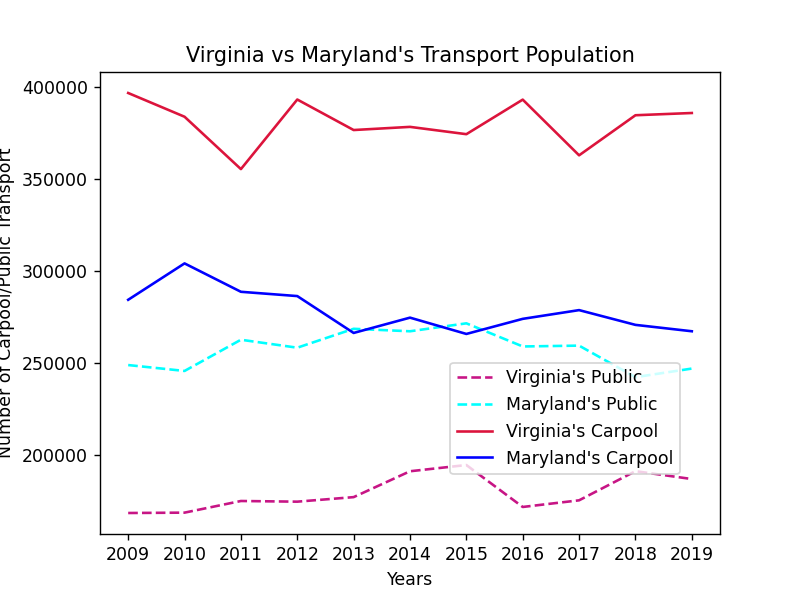

In [76]:
# Create a list of the years that we will use as our x axis
years = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
plt.figure()
# Plot our line that will be used to track a States's Carpool over the years...
plt.plot(years, publicTransit_over_time1, color="mediumvioletred", linestyle = '--', label=f"{state_1}'s Public")
plt.plot(years, publicTransit_over_time2, color="aqua", linestyle = '--', label=f"{state_2}'s Public")

# Plot our line that will be used to track a State's Driving over the years...
plt.plot(years, carpool_over_time1, color="crimson", label=f"{state_1}'s Carpool")
plt.plot(years, carpool_over_time2, color="blue", label=f"{state_2}'s Carpool")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.5), loc='center', borderaxespad=0.1)



plt.title(state_1 +  ' '+ 'vs' + ' ' + state_2 + "'s Transport Population") 
plt.xlabel("Years")
plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.ylabel("Number of Carpool/Public Transport")

# Print our chart to the screen
plt.show()
plt.savefig('..\Analysis_results\public transport_carpool.png', dpi=300)